<a href="https://colab.research.google.com/github/akitim/Ligand_activity_prediction_GlobalAI2022/blob/main/ligand_activity_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python -m pip install rdkit-pypi

     |████████████████████████████████| 20.6 MB 1.2 MB/s 


In [48]:
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd

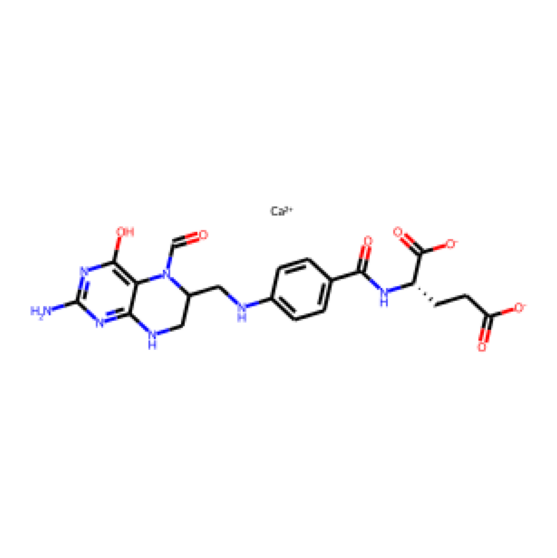

In [60]:
# mol = Chem.MolFromSmiles('CNNc1ccc(C(O)c2ccccc2)c(O)c1')
mol = Chem.MolFromSmiles('Nc1nc(O)c2c(n1)NCC(CNc1ccc(C(=O)N[C@@H](CCC(=O)[O-])C(=O)[O-])cc1)N2C=O.[Ca+2]')
im = Chem.Draw.MolToImage(mol)

plt.figure(figsize = (10, 10))
ax = plt.axes(frameon=True)
ax.imshow(im)
ax.axis('off');

In [85]:
train_path = 'https://raw.githubusercontent.com/akitim/Ligand_activity_prediction_GlobalAI2022/main/data/train.csv?token=GHSAT0AAAAAABQ5SI3LXM32UQGOCYRPOUM6YQE4AWQ'
test_path = 'https://raw.githubusercontent.com/akitim/Ligand_activity_prediction_GlobalAI2022/main/data/test.csv?token=GHSAT0AAAAAABQ5SI3LEQUBG7H4ODFLL2NSYQE4DBQ'

# train = pd.read_csv(train_path)
train = pd.read_csv('/content/train.csv')
train = train.loc[:, ['Smiles', 'Active']]
train.columns = ['smiles', 'active']
train['active'] = train['active'].astype('int32')
train.sample(5)

,smiles,active
1644,Cl.N=C(N)NN,0
1274,Nc1cc(C(Cl)=C(Cl)Cl)c(S(N)(=O)=O)cc1S(N)(=O)=O,0
3678,Cc1ccc(S(=O)(=O)Nc2ccc3c(c2)c(C(=O)C(F)(F)F)cn...,0
5390,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,0
2830,O=C(O)/C=C1\CCCc2ccccc2C1O,0


In [93]:
active_ind = train.groupby('active').groups[1]
not_active_ind = train.groupby('active').groups[0]
print(f"Active: {active_ind.size}\n\
Not active:{not_active_ind.size}")

Active: 206
Not active:5351


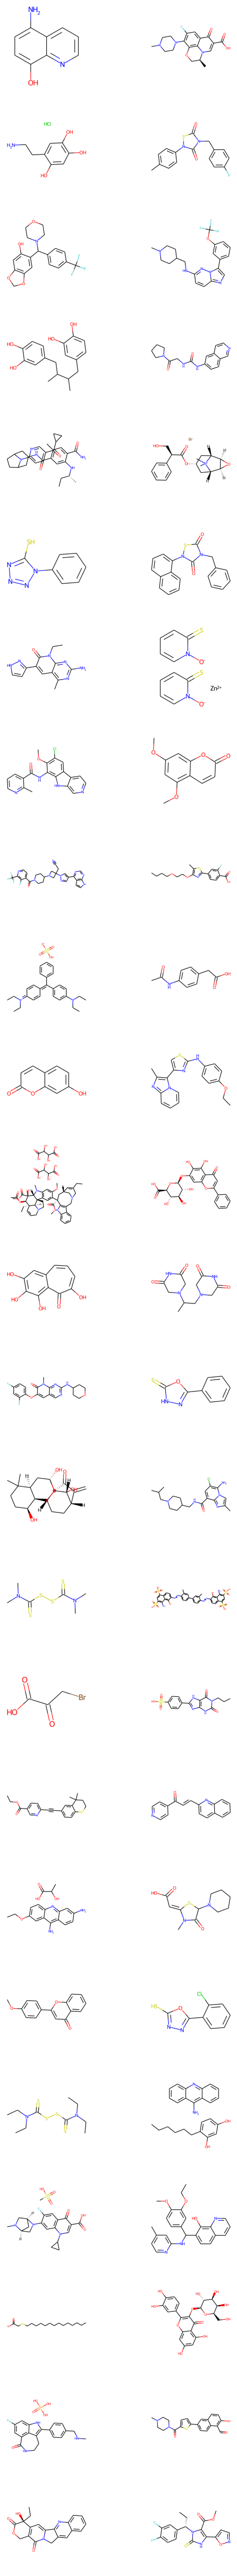

In [181]:
smiles_active = train.iloc[active_ind, :]['smiles'].values
fig, axs = plt.subplots(25, 2, figsize=(10, 100))
axs = axs.ravel()

for i, smpl in enumerate(smiles_active[:50]):
    mol = Chem.MolFromSmiles(smpl)
    im = Chem.Draw.MolToImage(mol)

    # plt.figure(figsize = (3, 3))
    # axs(i) = plt.axes(frameon=True)
    axs[i].imshow(im)
    axs[i].axis('off');